In [1]:

# LSTM for international airline passengers problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('per.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=14, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print(len(testX))
print(len(trainX))
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
print(trainPredict)
print(testPredict)


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/14
 - 1s - loss: 0.1187
Epoch 2/14
 - 0s - loss: 0.0836
Epoch 3/14
 - 0s - loss: 0.0583
Epoch 4/14
 - 0s - loss: 0.0385
Epoch 5/14
 - 0s - loss: 0.0271
Epoch 6/14
 - 0s - loss: 0.0181
Epoch 7/14
 - 0s - loss: 0.0143
Epoch 8/14
 - 0s - loss: 0.0120
Epoch 9/14
 - 0s - loss: 0.0109
Epoch 10/14
 - 0s - loss: 0.0101
Epoch 11/14
 - 0s - loss: 0.0094
Epoch 12/14
 - 0s - loss: 0.0089
Epoch 13/14
 - 0s - loss: 0.0082
Epoch 14/14
 - 0s - loss: 0.0077
9
25
Train Score: 3.51 RMSE
Test Score: 10.97 RMSE


<Figure size 640x480 with 1 Axes>

[[10.118426 ]
 [10.6263685]
 [11.140667 ]
 [11.660408 ]
 [12.1846695]
 [12.712523 ]
 [13.243049 ]
 [13.775334 ]
 [14.308488 ]
 [14.841648 ]
 [15.373978 ]
 [15.904678 ]
 [16.432999 ]
 [16.958231 ]
 [17.479713 ]
 [17.996834 ]
 [18.509039 ]
 [19.015821 ]
 [19.516735 ]
 [20.011383 ]
 [20.499426 ]
 [20.98056  ]
 [21.45455  ]
 [21.921194 ]
 [22.380339 ]]
[[24.560928]
 [24.97396 ]
 [25.379408]
 [25.777367]
 [26.167955]
 [26.5513  ]
 [26.927544]
 [27.296837]
 [27.659351]]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [17]:
dataFromCsv = pd.read_csv('../Analysis Data/covid-19-PerDayCaseSummaryBD.csv')
dataFromCsv['Date'] = pd.to_datetime(dataFromCsv['Date'], infer_datetime_format=True)
indexDataSet = dataFromCsv[['Date','Case']]
indexDataSet = indexDataSet.set_index(['Date'])
print(indexDataSet)

            Case
Date            
2020-03-08     3
2020-03-09     0
2020-03-10     0
2020-03-11     0
2020-03-12     0
2020-03-13     0
2020-03-14     0
2020-03-15     2
2020-03-16     3
2020-03-17     2
2020-03-18     4
2020-03-19     3
2020-03-20     3
2020-03-21     4
2020-03-22     3
2020-03-23     6
2020-03-24     6
2020-03-25     0
2020-03-26     5
2020-03-27     4
2020-03-28     0
2020-03-29     0
2020-03-30     1
2020-03-31     2
2020-04-01     3
2020-04-02     2
2020-04-03     5
2020-04-04     9
2020-04-05    18
2020-04-06    35
2020-04-07    41
2020-04-08    54
2020-04-09   112
2020-04-10    94
2020-04-11    58
2020-04-12   139
2020-04-13   182
2020-04-14   209
2020-04-15   268
2020-04-16   292
2020-04-17   266
2020-04-18   306
2020-04-19   312
2020-04-20   492


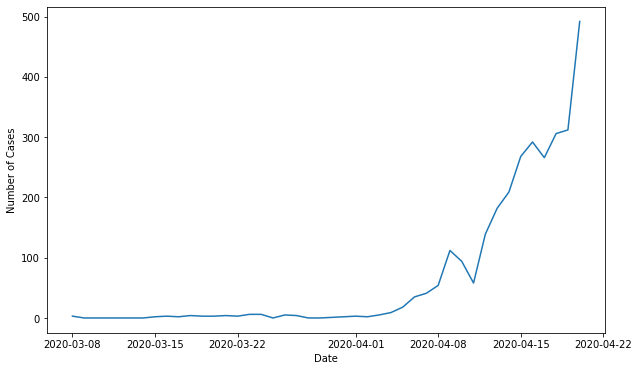

In [19]:
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.plot(indexDataSet)

In [22]:
rolemean = indexDataSet.rolling(window = 5).mean()
rolestd = indexDataSet.rolling(window = 5).std()
print(rolemean)

             Case
Date             
2020-03-08    NaN
2020-03-09    NaN
2020-03-10    NaN
2020-03-11    NaN
2020-03-12    0.6
2020-03-13    0.0
2020-03-14    0.0
2020-03-15    0.4
2020-03-16    1.0
2020-03-17    1.4
2020-03-18    2.2
2020-03-19    2.8
2020-03-20    3.0
2020-03-21    3.2
2020-03-22    3.4
2020-03-23    3.8
2020-03-24    4.4
2020-03-25    3.8
2020-03-26    4.0
2020-03-27    4.2
2020-03-28    3.0
2020-03-29    1.8
2020-03-30    2.0
2020-03-31    1.4
2020-04-01    1.2
2020-04-02    1.6
2020-04-03    2.6
2020-04-04    4.2
2020-04-05    7.4
2020-04-06   13.8
2020-04-07   21.6
2020-04-08   31.4
2020-04-09   52.0
2020-04-10   67.2
2020-04-11   71.8
2020-04-12   91.4
2020-04-13  117.0
2020-04-14  136.4
2020-04-15  171.2
2020-04-16  218.0
2020-04-17  243.4
2020-04-18  268.2
2020-04-19  288.8
2020-04-20  333.6


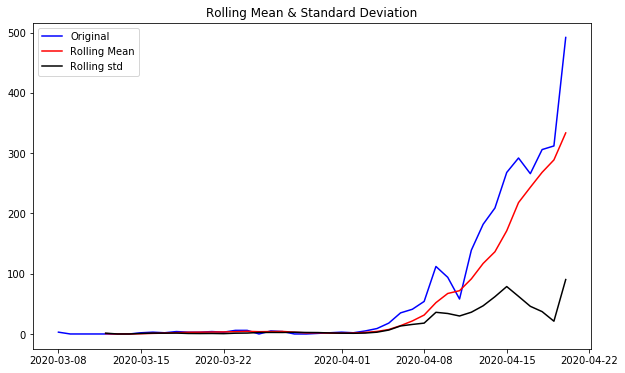

In [24]:
orig = plt.plot(indexDataSet, color='blue', label = 'Original')
mean = plt.plot(rolemean, color='red', label = 'Rolling Mean')
std = plt.plot(rolestd, color='black', label = 'Rolling std')

plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [26]:
# Dickry-fuller test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(indexDataSet['Case'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Crititical Values (%s)'%key] = value
    
print(dfoutput)

Test Statistic                 -0.272792
p-value                         0.929270
Lags Used                      10.000000
Number of Observations Used    33.000000
Crititical Values (1%)         -3.646135
Crititical Values (5%)         -2.954127
Crititical Values (10%)        -2.615968
dtype: float64


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


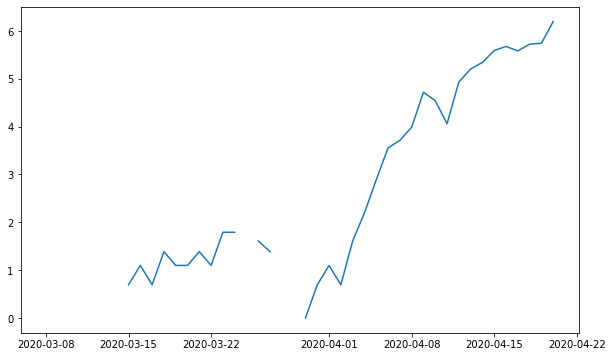

In [28]:
indexDataSet_logScale = np.log(indexDataSet)
plt.plot(indexDataSet_logScale)